In [1]:
# It contains all operations for building a machine learning model

Importing files/data from analysis.ipynb file for creating model

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       1500 non-null   object
 1   star            1500 non-null   object
 2   fork            1500 non-null   object
 3   watch           1500 non-null   object
 4   issue           1500 non-null   object
 5   tags            1500 non-null   object
 6   description     1480 non-null   object
 7   contributers    1500 non-null   object
 8   license         1500 non-null   object
 9   repo_url        1500 non-null   object
 10  most_used_lang  1297 non-null   object
dtypes: object(11)
memory usage: 140.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       1500 non-null   object
 1   star            1500 non-null   ob

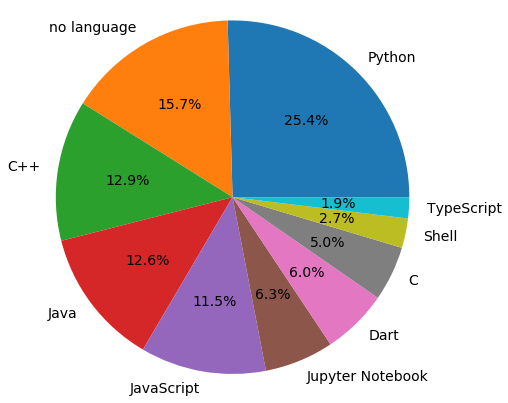

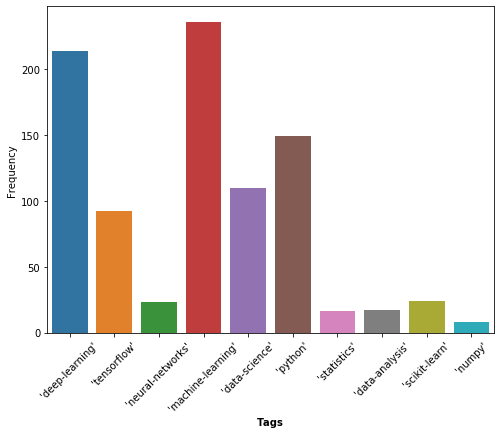

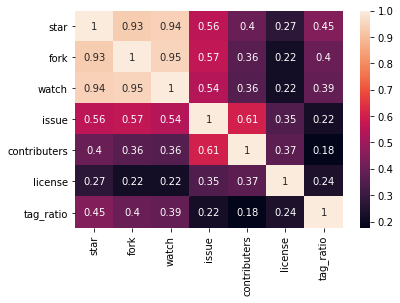

In [2]:
%run analysis.ipynb

In [3]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang,tag_ratio
0,keras,47900,18100,2100,2940,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,49,1,https://github.com/keras-team/keras,Python,9.439798
1,scikit-learn,40300,19600,2200,1505,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,108,1,https://github.com/scikit-learn/scikit-learn,Python,6.048803
2,PythonDataScienceHandbook,23100,9900,1500,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,0,1,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook,2.463054
3,Probabilistic-Programming-and-Bayesian-Methods...,21000,6600,1400,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",0,1,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook,1.752778
4,Data-Science--Cheat-Sheet,18400,8200,1500,7,[],Cheat Sheets,0,0,https://github.com/abhat222/Data-Science--Chea...,no language,0.000000


Description is also play a role in the popularity of your repos, so we need to clean  `description` tuple by removing punctuations and creating word counts.

In [4]:
data['description']=data['description'].str.replace('\W'," ")
data['description']=data['description'].str.lower()

For creating word count will require all unique words in the message(vocabulary)

In [5]:
data['description']=data['description'].str.split()
vocabulary = []
for sms in data['description']:
    for word in sms:
        vocabulary.append(word)
        
vocabulary = list(set(vocabulary))

In [6]:
vocabulary[:10]

['fileserver',
 'moshi',
 'uis',
 '技术面试必备基础知识',
 'gulp',
 'cvae',
 'x',
 'hyper',
 'convert',
 'streaming']

From above we can see that their are some numerical values and stopwords too, so we need to remove them from vocabulary list

In [7]:
vocab = [item for item in vocabulary if not item.isdigit()]

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword=stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Prem Chandra
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
for word in stopword:
    if word in vocab:
        vocab.remove(word)

In [10]:
word_counts_per_sms = {unique_word: [0] * len(data['description']) for unique_word in vocab}

for index, lines in enumerate(data['description']):
    for word in lines:
        if word in vocab:
            word_counts_per_sms[word][index] += 1

In [11]:
word_col=pd.DataFrame(word_counts_per_sms)

Removing tuples that are required and concatenate both the dataframes

In [12]:
data.drop(['repo_name','repo_url','most_used_lang', 'tags', 'description'],axis=1,inplace=True)
testing_set=pd.concat([data,word_col],axis=1)

In [13]:
testing_set.head()

,star,fork,watch,issue,contributers,license,tag_ratio,fileserver,moshi,uis,...,anomaly,taught,后端同学必看,dictionary,free,php资源大全中文版,peripheral,summarization,apps,range
0,47900,18100,2100,2940,49,1,9.439798,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40300,19600,2200,1505,108,1,6.048803,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23100,9900,1500,65,0,1,2.463054,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21000,6600,1400,127,0,1,1.752778,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18400,8200,1500,7,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
## LR can be used:
# gradient descent
# reandom forest 
# NN regression (Relu)
# Lasso regression
# Ridge regression
# Elastic netregression


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(testing_set.iloc[:,1:], testing_set.iloc[:,0], test_size=0.2, random_state=42)

Gradient Descent

In [16]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(loss='squared_loss',alpha=0.01,max_iter=1500)
sgd.fit(X_train, y_train)
predictions = sgd.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)

4760850166487459.0


Normal Equation

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)

3819789833.409999


Random forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=20, random_state=1)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)

5899.789812291228


In [19]:
# from numpy import loadtxt
# from keras.models import Sequential
# from keras.layers import Dense
# X = testing_set.iloc[:,1:]
# y = testing_set.iloc[:,0]

# model = Sequential()
# model.add(Dense(5, input_dim=3987, activation='relu'))
# model.add(Dense(1, activation='relu'))


# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X, y, epochs=150, batch_size=10)

# _, accuracy = model.evaluate(X, y)
# print('Accuracy: %.2f' % (accuracy*100))

Lasso


In [20]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=0.01,max_iter=2000)
las.fit(X_train, y_train)
predictions = las.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)

9070.701401287948


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83076382.83958678, tolerance: 34757631.99494366
  positive)


In [21]:
from sklearn import linear_model
las = linear_model.Ridge(alpha=0.001,max_iter=3000)
las.fit(X_train, y_train)
predictions = las.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)
print(las.score(X_test,y_test))

9917.154830959948
0.6617470718580374


Elastic netregression

In [22]:
from sklearn.linear_model import ElasticNet
elsnr = ElasticNet(alpha=0.1,max_iter=3000)
elsnr.fit(X_train, y_train)
predictions = elsnr.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)
print(elsnr.score(X_test,y_test))

5038.803357542976
0.9126782968756727
